# **Module 3 - Eye Direction Detection**


**Eye Direction Detection From Image**

Saving E0A1CCCA-8BC8-4B37-A82B-58A34BB34B77.jpeg to E0A1CCCA-8BC8-4B37-A82B-58A34BB34B77.jpeg


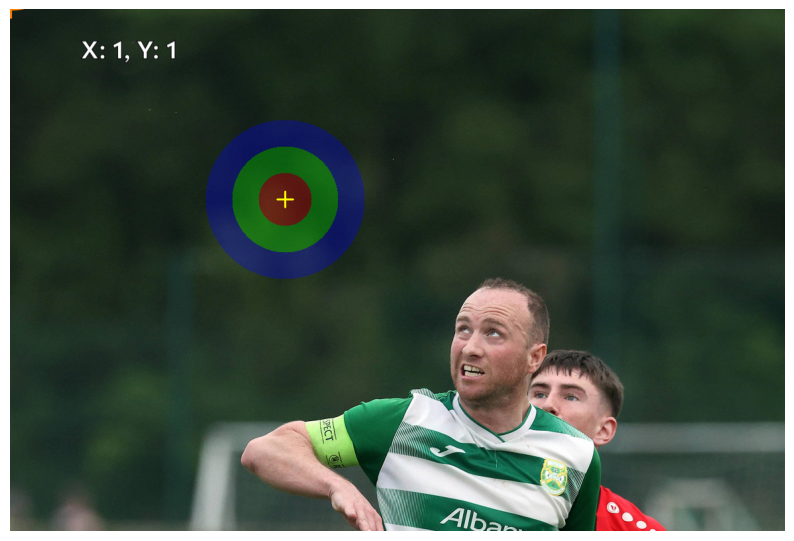

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Haar cascades for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to detect objects using a simple object detector
def detect_objects(frame):
    detected_objects = []  # List to store object locations
    height, width = frame.shape[:2]

    # Example: hard-coded rectangle representing an object
    detected_objects.append(((width // 3, height // 3), (width // 3 + 50, height // 3 + 50)))

    return detected_objects

# Load an example image (replace 'example.jpg' with your image file path)
from google.colab import files
uploaded = files.upload()

# Assume the uploaded file is an image
image_path = list(uploaded.keys())[0]

# Step 3: Load the image
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load the image.")
    exit()

# Detect faces
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Main logic to detect objects and mark with nested circles and a plus symbol
object_locations = detect_objects(image)

# Create an overlay for transparency
overlay = image.copy()

# Mark objects with nested circles and a plus symbol (+)
for (start_point, end_point) in object_locations:
    # Calculate the center of the detected object
    center_x = (start_point[0] + end_point[0]) // 2
    center_y = (start_point[1] + end_point[1]) // 2

    # Define colors for the circles
    circle_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Red, Green, Blue
    circle_radii = [120, 80, 40]  # From largest to smallest

    # Draw nested circles
    for radius, color in zip(circle_radii, circle_colors):
        cv2.circle(overlay, (center_x, center_y), radius, color, -1)

    # Blend the overlay with the original image
    alpha = 0.3  # Opacity factor
    image = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)

    # Draw the plus symbol on top of the circles
    size = 12  # Size of the plus symbol
    cv2.line(image, (center_x - size, center_y), (center_x + size, center_y), (0, 255, 255), 2)  # Horizontal line
    cv2.line(image, (center_x, center_y - size), (center_x, center_y + size), (0, 255, 255), 2)  # Vertical line

# Convert image to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
# plt.title("Nested Circles with Plus Symbol")
plt.show()
